In [ ]:
# Set the number of GPU-device
%env CUDA_VISIBLE_DEVICES=2

In [2]:
# some imports
import sys
import warnings
warnings.filterwarnings("ignore")

from copy import copy
import numpy as np

sys.path.append('../../..')

from seismiqb import *

from seismiqb.batchflow import FilesIndex

# Load horizon

In [3]:
cube_path = "/data/seismic_data/seismic_interpretation/CUBE_01_ETP/amplitudes_01_ETP.hdf5"
horizon_dir = '/data/seismic_data/seismic_interpretation/CUBE_01_ETP/INPUTS/HORIZONS/RAW/etp_B_anon'

In [4]:
dsi = FilesIndex(path=[cube_path], no_ext=True)
dataset = SeismicCubeset(dsi)

dataset.load(horizon_dir)
dataset.create_labels({dataset.indices[0]: [horizon_dir]})
dataset.modify_sampler(dst='train_sampler', finish=True)

geometry = dataset.geometries[0]
horizon = dataset.labels[0][0]

In [5]:
init_horizon_copy = horizon.__copy__()

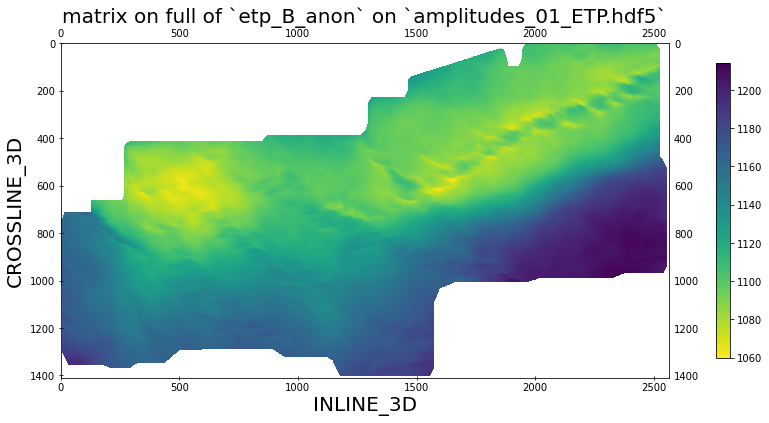

In [6]:
horizon.show()

# Simple random figures

In [7]:
%%time
filtering_matrix = horizon.make_random_holes_matrix(n=20, points_proportion=0, noise_level=0, seed=0)

CPU times: user 1.26 s, sys: 19.8 ms, total: 1.28 s
Wall time: 1.28 s


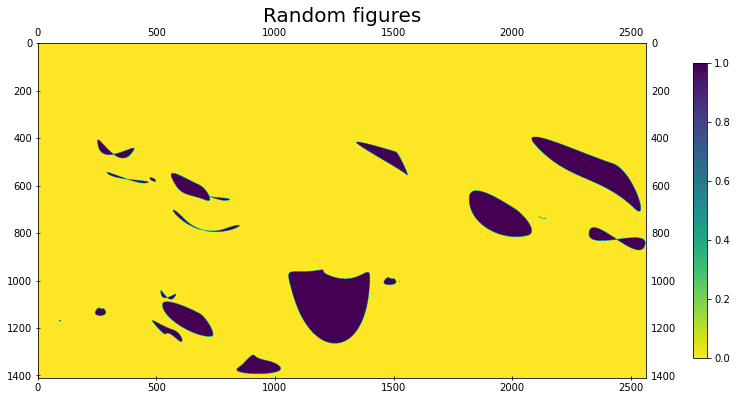

In [8]:
plot_image(filtering_matrix, title="Random figures")

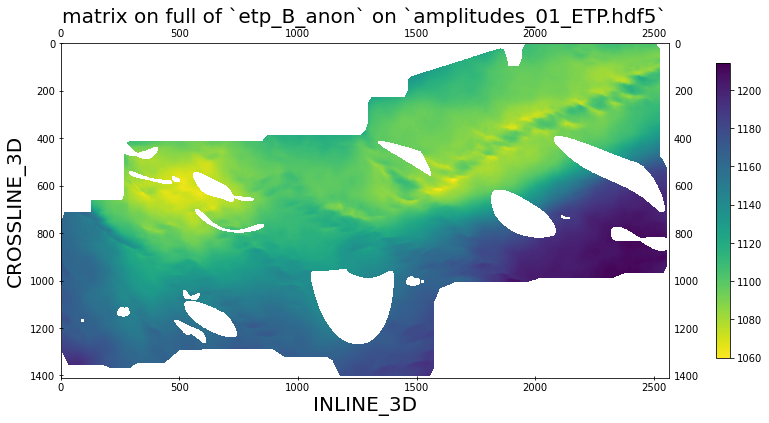

In [9]:
horizon.filter(filtering_matrix=filtering_matrix)
horizon.show()

# Noisy random figures

In [10]:
horizon = init_horizon_copy.__copy__()

In [11]:
%%time
filtering_matrix = horizon.make_random_holes_matrix(n=20, points_proportion=0, noise_level=25, seed=0)

CPU times: user 1.31 s, sys: 42.7 ms, total: 1.35 s
Wall time: 1.35 s


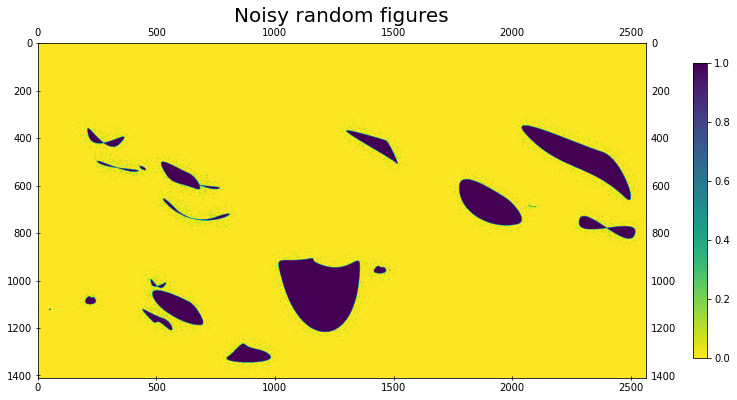

In [12]:
plot_image(filtering_matrix, title="Noisy random figures")

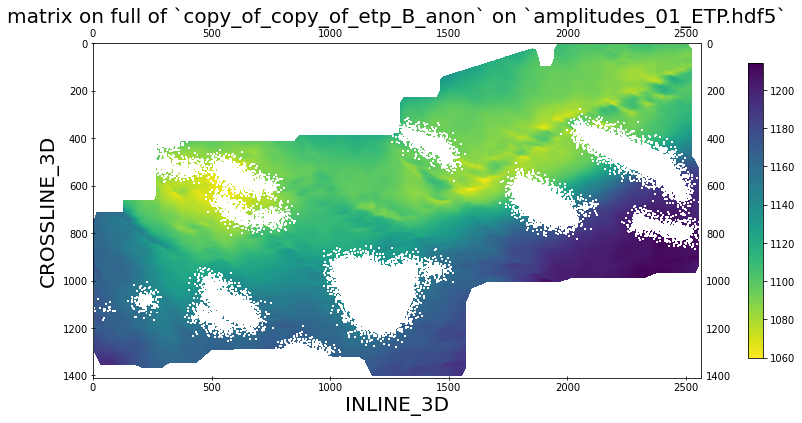

In [13]:
horizon.filter(filtering_matrix=filtering_matrix)
horizon.show()

# Noisy random figures and point holes

In [14]:
horizon = init_horizon_copy.__copy__()

In [15]:
%%time
filtering_matrix = horizon.make_random_holes_matrix(n=20, points_proportion=1e-5, points_shape=5, noise_level=25, seed=0)

CPU times: user 1.45 s, sys: 12.2 ms, total: 1.47 s
Wall time: 1.47 s


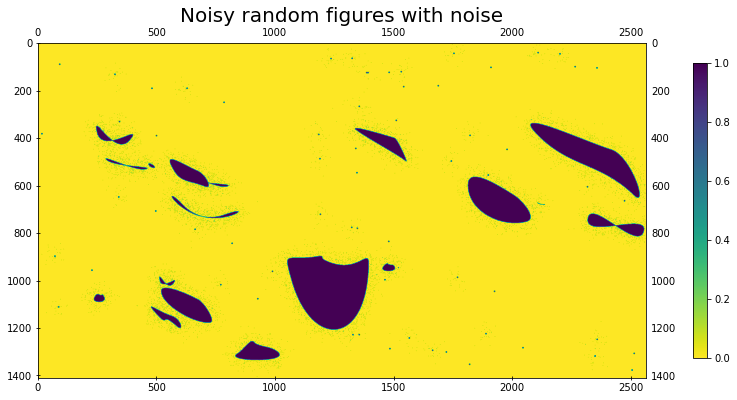

In [16]:
plot_image(filtering_matrix, title="Noisy random figures with noise")

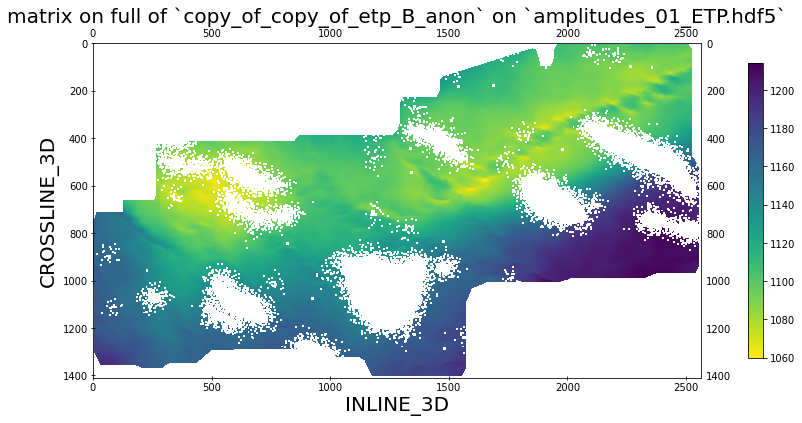

In [17]:
horizon.filter(filtering_matrix=filtering_matrix)
horizon.show()